In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# Import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | hadejia
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | bernalda
Processing Record 7 of Set 1 | burnie
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | sumbe
Processing Record 10 of Set 1 | flagstaff
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | elizabeth city
Processing Record 16 of Set 1 | moindou
Processing Record 17 of Set 1 | cozumel
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | itarema
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | samarai
Processing Record 23 o

Processing Record 42 of Set 4 | prieska
Processing Record 43 of Set 4 | tabou
Processing Record 44 of Set 4 | goryachegorsk
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | necochea
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | meadow lake
Processing Record 1 of Set 5 | nizhneudinsk
Processing Record 2 of Set 5 | san lorenzo
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | markala
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | putina
Processing Record 7 of Set 5 | coatzintla
Processing Record 8 of Set 5 | wagar
Processing Record 9 of Set 5 | natal
Processing Record 10 of Set 5 | makat
Processing Record 11 of Set 5 | norman wells
Processing Record 12 of Set 5 | leshukonskoye
Processing Record 13 of Set 5 | agirish
Processing Record 14 of Set 5 | lyuban
Processing Record 1

Processing Record 33 of Set 8 | neosho
Processing Record 34 of Set 8 | esil
Processing Record 35 of Set 8 | moerai
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | tromso
Processing Record 38 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | torbay
Processing Record 42 of Set 8 | temaraia
City not found. Skipping...
Processing Record 43 of Set 8 | debre birhan
Processing Record 44 of Set 8 | sangar
Processing Record 45 of Set 8 | nouakchott
Processing Record 46 of Set 8 | nurota
Processing Record 47 of Set 8 | honiara
Processing Record 48 of Set 8 | sheltozero
Processing Record 49 of Set 8 | guaruja
Processing Record 50 of Set 8 | channel-port aux basques
Processing Record 1 of Set 9 | hue
Processing Record 2 of Set 9 | praia
Processing Record 3 of Set 9 | mackenzie
Processing Record 4 of Set 9 | koumac
Processing Record 5 of Set 9 | portland


Processing Record 22 of Set 12 | sept-iles
Processing Record 23 of Set 12 | ocos
Processing Record 24 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 12 | iberia
Processing Record 26 of Set 12 | port augusta
Processing Record 27 of Set 12 | zhezkazgan
Processing Record 28 of Set 12 | erzin
Processing Record 29 of Set 12 | iwanai
Processing Record 30 of Set 12 | elk city
Processing Record 31 of Set 12 | kandete
Processing Record 32 of Set 12 | haibowan
City not found. Skipping...
Processing Record 33 of Set 12 | mount pleasant
Processing Record 34 of Set 12 | lugovoy
Processing Record 35 of Set 12 | sibu
Processing Record 36 of Set 12 | northfield
Processing Record 37 of Set 12 | nizhnyaya tavda
Processing Record 38 of Set 12 | kot putli
City not found. Skipping...
Processing Record 39 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 12 | ekangala
Processing Record 41 of Set 12 | sobolevo
Processing Record 42 of Set 12 | karra

In [10]:
len(city_data)

558

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,66.52,91,97,4.72,BR,2021-08-04 09:15:42
1,Victoria,22.2855,114.1577,86.38,88,100,3.00,HK,2021-08-04 09:15:42
2,Hadejia,12.4498,10.0444,84.69,58,89,6.49,NG,2021-08-04 09:15:43
3,Tuktoyaktuk,69.4541,-133.0374,43.38,74,100,8.16,CA,2021-08-04 09:15:43
4,Bernalda,40.4128,16.6920,95.68,46,0,6.91,IT,2021-08-04 09:15:43
5,Burnie,-41.0667,145.9167,51.40,72,91,14.65,AU,2021-08-04 09:15:44
6,Sitka,57.0531,-135.3300,60.69,82,90,4.61,US,2021-08-04 09:15:44
7,Sumbe,-11.2061,13.8437,75.43,70,77,3.13,AO,2021-08-04 09:15:45
8,Flagstaff,35.1981,-111.6513,71.26,31,0,1.01,US,2021-08-04 09:15:45
9,Kapaa,22.0752,-159.3190,79.12,77,40,5.01,US,2021-08-04 09:15:46


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2021-08-04 09:15:42,-17.7125,-39.2481,66.52,91,97,4.72
1,Victoria,HK,2021-08-04 09:15:42,22.2855,114.1577,86.38,88,100,3.00
2,Hadejia,NG,2021-08-04 09:15:43,12.4498,10.0444,84.69,58,89,6.49
3,Tuktoyaktuk,CA,2021-08-04 09:15:43,69.4541,-133.0374,43.38,74,100,8.16
4,Bernalda,IT,2021-08-04 09:15:43,40.4128,16.6920,95.68,46,0,6.91
5,Burnie,AU,2021-08-04 09:15:44,-41.0667,145.9167,51.40,72,91,14.65
6,Sitka,US,2021-08-04 09:15:44,57.0531,-135.3300,60.69,82,90,4.61
7,Sumbe,AO,2021-08-04 09:15:45,-11.2061,13.8437,75.43,70,77,3.13
8,Flagstaff,US,2021-08-04 09:15:45,35.1981,-111.6513,71.26,31,0,1.01
9,Kapaa,US,2021-08-04 09:15:46,22.0752,-159.3190,79.12,77,40,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

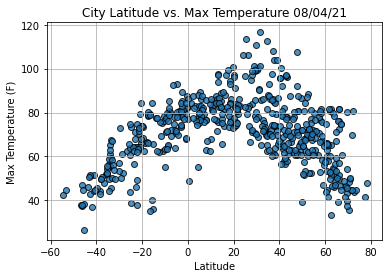

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

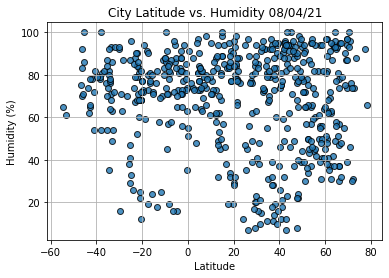

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

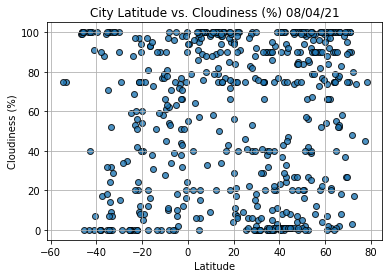

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

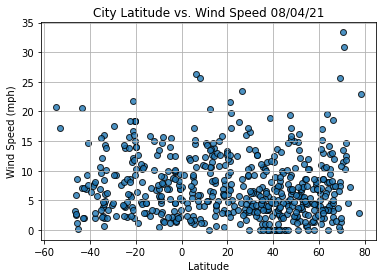

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()